# --- 1. Import Libraries ---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

# Load dataset
df = pd.read_csv('hospital_readmissions.csv')

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (25000, 17)


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


# --- 2. Basic Info ---

In [4]:
# Data types and non-null counts
df.info()

# Summary statistics for numerical variables
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [5]:
# Confirming missing values
df.isnull().sum().sum()



np.int64(0)

# --- 3. Encode Target Variable ---

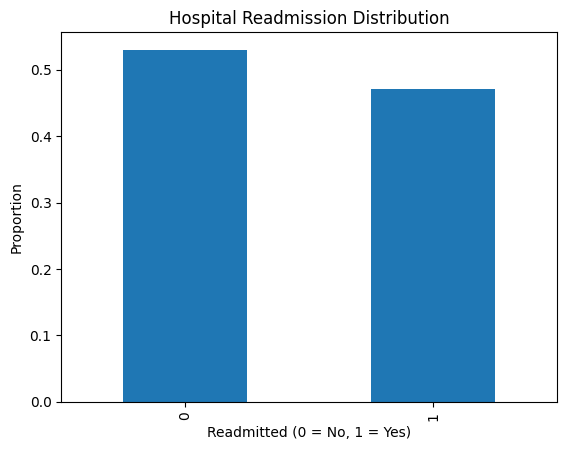

Readmission Rate: 0.47016


In [6]:
# Convert target to binary
df['readmitted_binary'] = df['readmitted'].map({'yes': 1, 'no': 0})

# Distribution of the Hospital Readmission 
plt.figure()
df['readmitted_binary'].value_counts(normalize=True).plot(kind='bar')
plt.title("Hospital Readmission Distribution")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Proportion")
plt.show()

print("Readmission Rate:", df['readmitted_binary'].mean())


In [7]:
age_map = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65,
    '[70-80)': 75, '[80-90)': 85, '[90-100)': 95
}

df['age_mid'] = df['age'].map(age_map)


# --- 4. Exploratory Visualizations ---

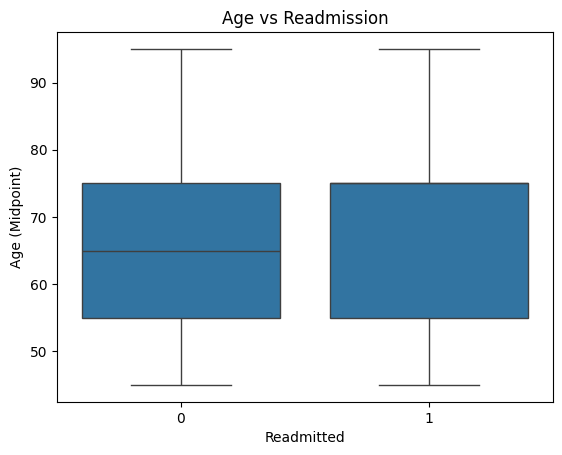

readmitted_binary
0    68.065831
1    68.864216
Name: age_mid, dtype: float64

In [8]:
# Age vs Readmission

plt.figure()
sns.boxplot(x='readmitted_binary', y='age_mid', data=df)
plt.title("Age vs Readmission")
plt.xlabel("Readmitted")
plt.ylabel("Age (Midpoint)")
plt.show()

df.groupby('readmitted_binary')['age_mid'].mean()


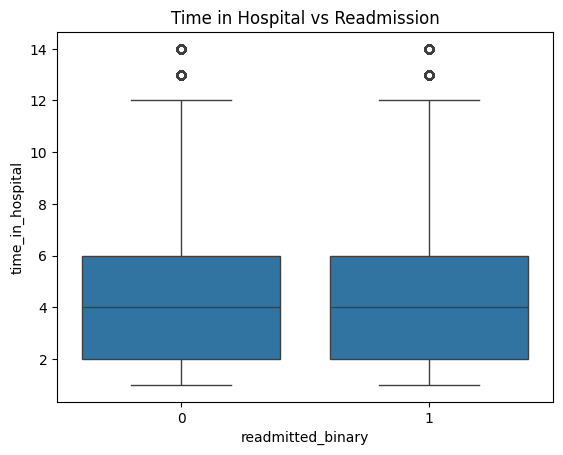

readmitted_binary
0    4.331345
1    4.590778
Name: time_in_hospital, dtype: float64

In [9]:
# Time in Hospital vs Readmission

plt.figure()
sns.boxplot(x='readmitted_binary', y='time_in_hospital', data=df)
plt.title("Time in Hospital vs Readmission")
plt.show()

df.groupby('readmitted_binary')['time_in_hospital'].mean()


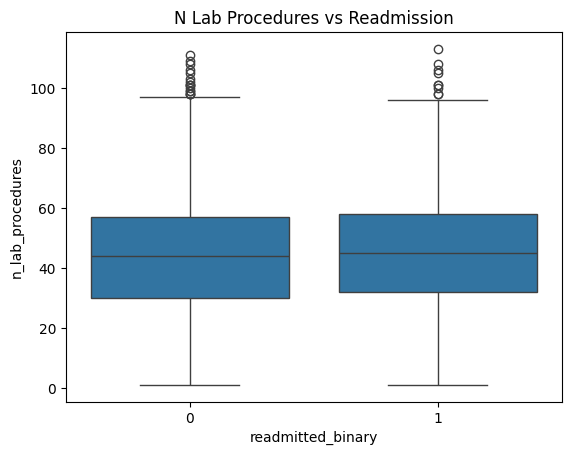

n_lab_procedures readmitted_binary
0    42.625245
1    43.934405
Name: n_lab_procedures, dtype: float64


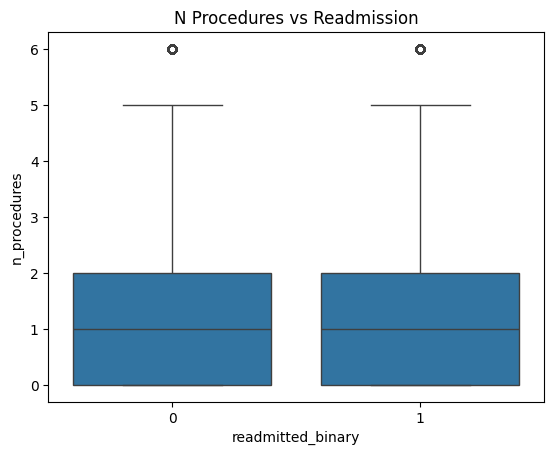

n_procedures readmitted_binary
0    1.424204
1    1.271397
Name: n_procedures, dtype: float64


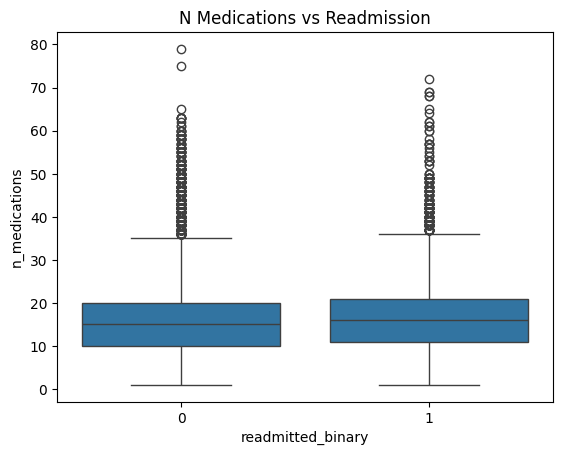

n_medications readmitted_binary
0    15.972445
1    16.567892
Name: n_medications, dtype: float64


In [11]:
# Utilization features

utilization_cols = [
    'n_lab_procedures', 'n_procedures', 'n_medications'
]

for col in utilization_cols:
    plt.figure()
    sns.boxplot(x='readmitted_binary', y=col, data=df)
    plt.title(f"{col.replace('_',' ').title()} vs Readmission")
    plt.show()

    print(col, df.groupby('readmitted_binary')[col].mean())


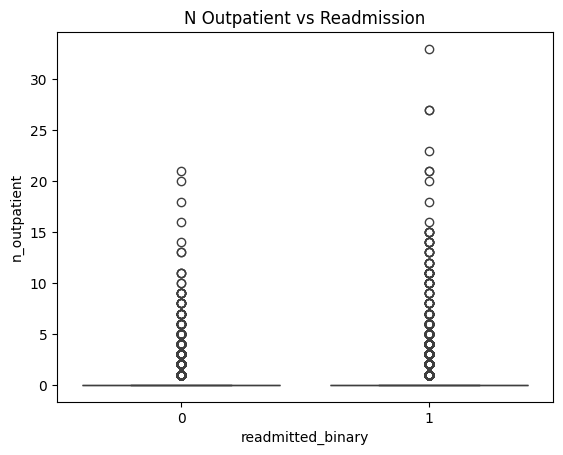

n_outpatient readmitted_binary
0    0.258871
1    0.487579
Name: n_outpatient, dtype: float64


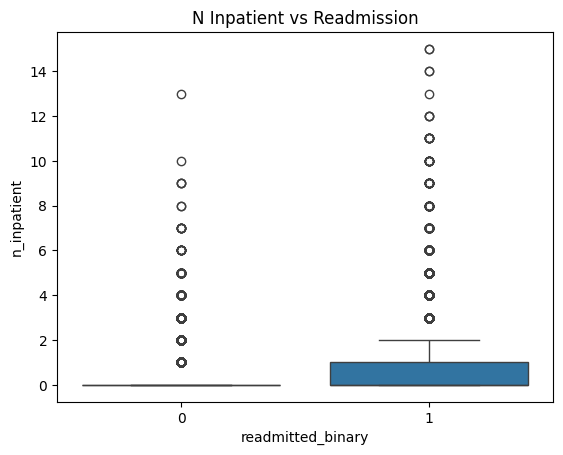

n_inpatient readmitted_binary
0    0.380190
1    0.881657
Name: n_inpatient, dtype: float64


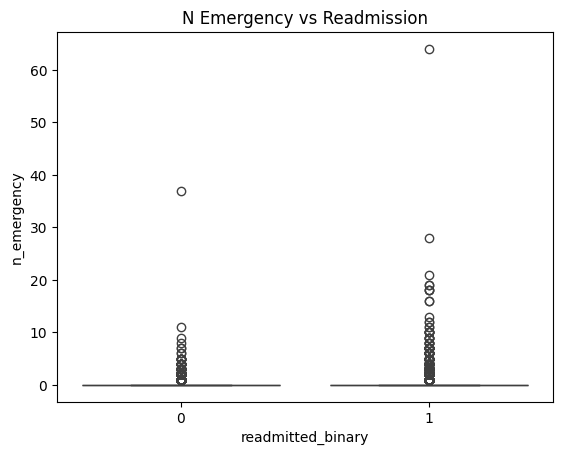

n_emergency readmitted_binary
0    0.108561
1    0.274545
Name: n_emergency, dtype: float64


In [12]:
# Prior visits

prior_cols = ['n_outpatient', 'n_inpatient', 'n_emergency']

for col in prior_cols:
    plt.figure()
    sns.boxplot(x='readmitted_binary', y=col, data=df)
    plt.title(f"{col.replace('_',' ').title()} vs Readmission")
    plt.show()

    print(col, df.groupby('readmitted_binary')[col].mean())


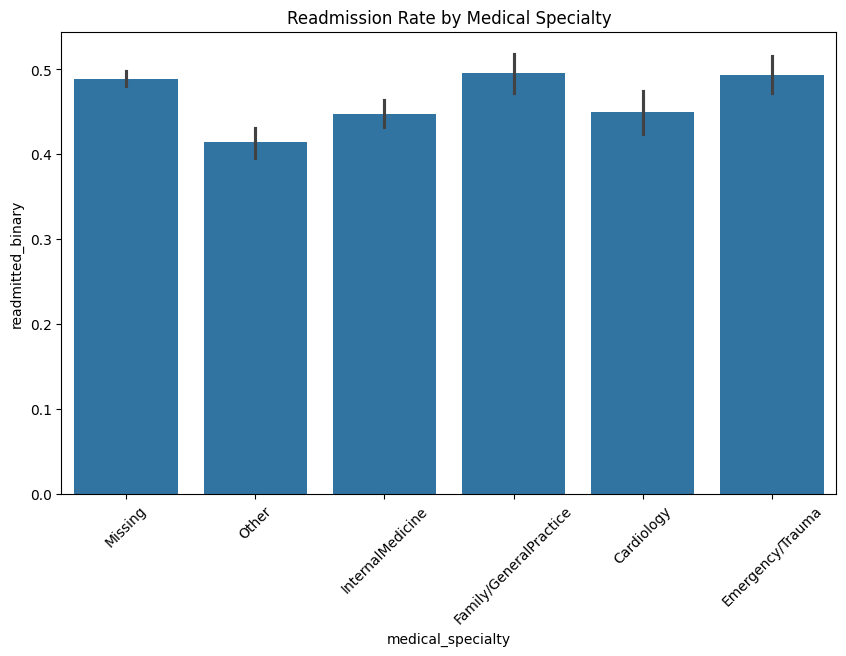

In [13]:
# Top Medical Specialties

top_specialties = df['medical_specialty'].value_counts().head(6).index
subset = df[df['medical_specialty'].isin(top_specialties)]

plt.figure(figsize=(10,6))
sns.barplot(
    data=subset,
    x='medical_specialty',
    y='readmitted_binary',
    estimator=np.mean
)
plt.title("Readmission Rate by Medical Specialty")
plt.xticks(rotation=45)
plt.show()


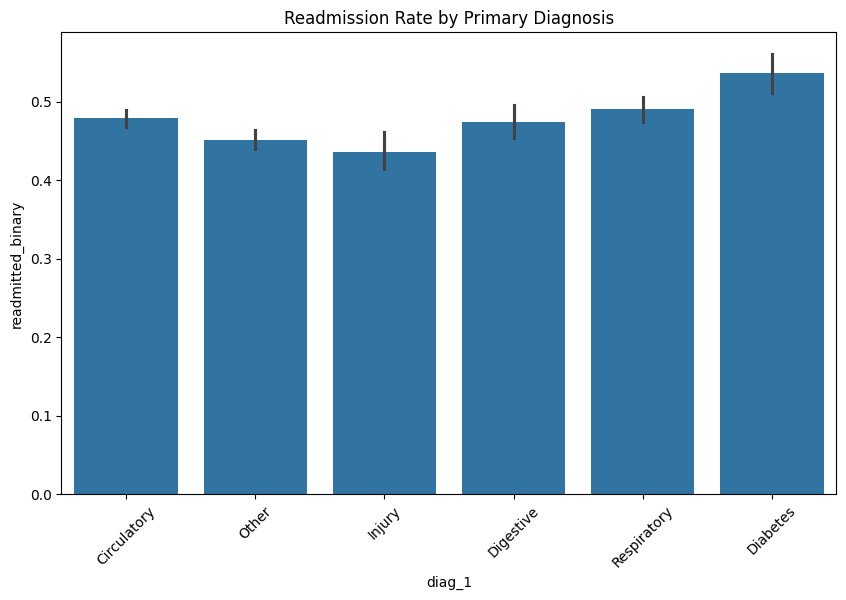

In [14]:
# Top Primary Diagnoses

top_diag = df['diag_1'].value_counts().head(6).index
subset_diag = df[df['diag_1'].isin(top_diag)]

plt.figure(figsize=(10,6))
sns.barplot(
    data=subset_diag,
    x='diag_1',
    y='readmitted_binary',
    estimator=np.mean
)
plt.title("Readmission Rate by Primary Diagnosis")
plt.xticks(rotation=45)
plt.show()


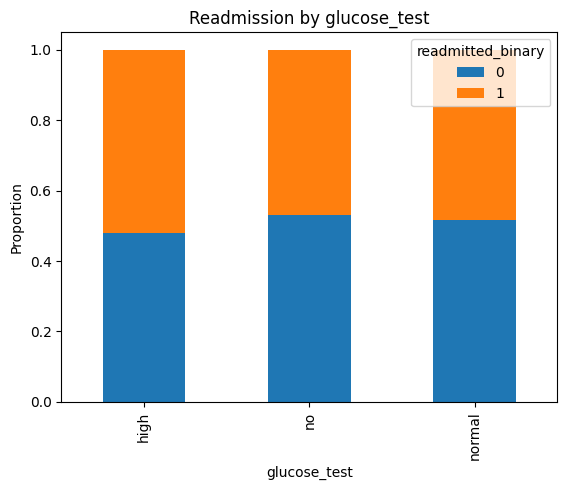

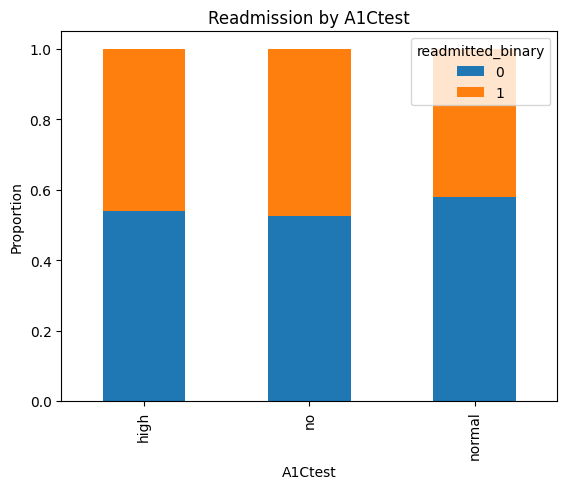

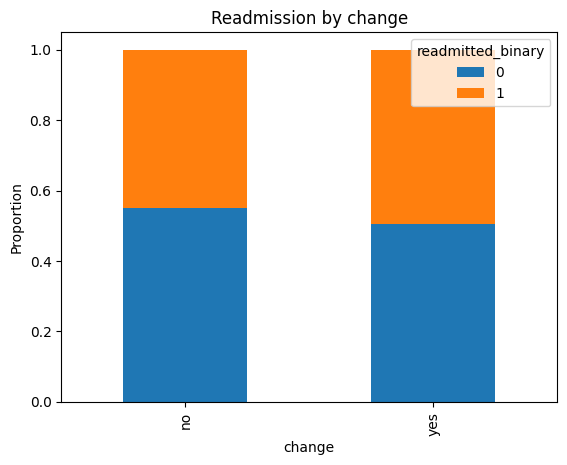

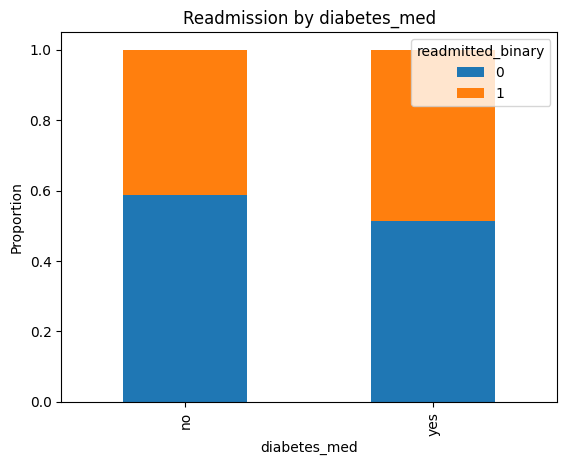

In [15]:
# Diabetes-related columns

diabetes_cols = [
    'glucose_test', 'A1Ctest', 'change', 'diabetes_med'
]

for col in diabetes_cols:
    readmit_rates = pd.crosstab(
        df[col],
        df['readmitted_binary'],
        normalize='index'
    )

    readmit_rates.plot(kind='bar', stacked=True)
    plt.title(f"Readmission by {col}")
    plt.ylabel("Proportion")
    plt.show()


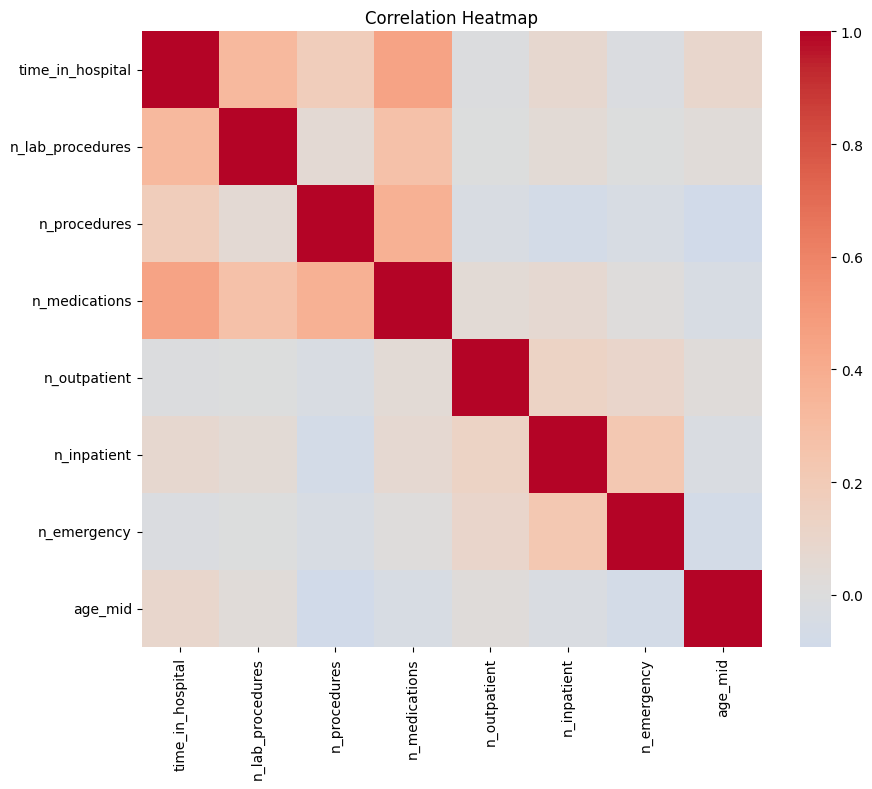

In [38]:
# Correlation Heatmap

numeric_cols = [
    'time_in_hospital', 'n_lab_procedures',
    'n_procedures', 'n_medications',
    'n_outpatient', 'n_inpatient', 'n_emergency',
    'age_mid'
]

plt.figure(figsize=(10,8))
sns.heatmap(
    df[numeric_cols].corr(),
    cmap='coolwarm',
    center=0
)
plt.title("Correlation Heatmap")
plt.show()


In [17]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

# --- 5. Feature Engineering ---


In [18]:
# Replace '?' in diagnosis/specialty columns
for col in ['diag_1', 'diag_2', 'diag_3', 'medical_specialty']:
    df[col] = df[col].replace('?', 'Unknown')

# Categorical columns for one-hot encoding
cat_cols = [
    'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
    'glucose_test', 'A1Ctest', 'change', 'diabetes_med'
]

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale numeric columns
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


# --- 6. Modeling ---

In [19]:
# --- 8. Train/Test Split ---
X = df_encoded.drop(['readmitted', 'readmitted_binary', 'age'], axis=1)
y = df_encoded['readmitted_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
# Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.60      0.78      0.68      2649
           1       0.63      0.42      0.50      2351

    accuracy                           0.61      5000
   macro avg       0.62      0.60      0.59      5000
weighted avg       0.62      0.61      0.60      5000

Confusion Matrix:
 [[2077  572]
 [1372  979]]


In [21]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      2649
           1       0.59      0.51      0.55      2351

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.60      0.61      0.60      5000

Confusion Matrix:
 [[1829  820]
 [1155 1196]]


In [25]:
# ROC-AUC for Random Forest
y_proba_rf = model_rf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, y_proba_rf)
print("Random Forest ROC-AUC Score:", roc_score)

Random Forest ROC-AUC Score: 0.6261600607212917


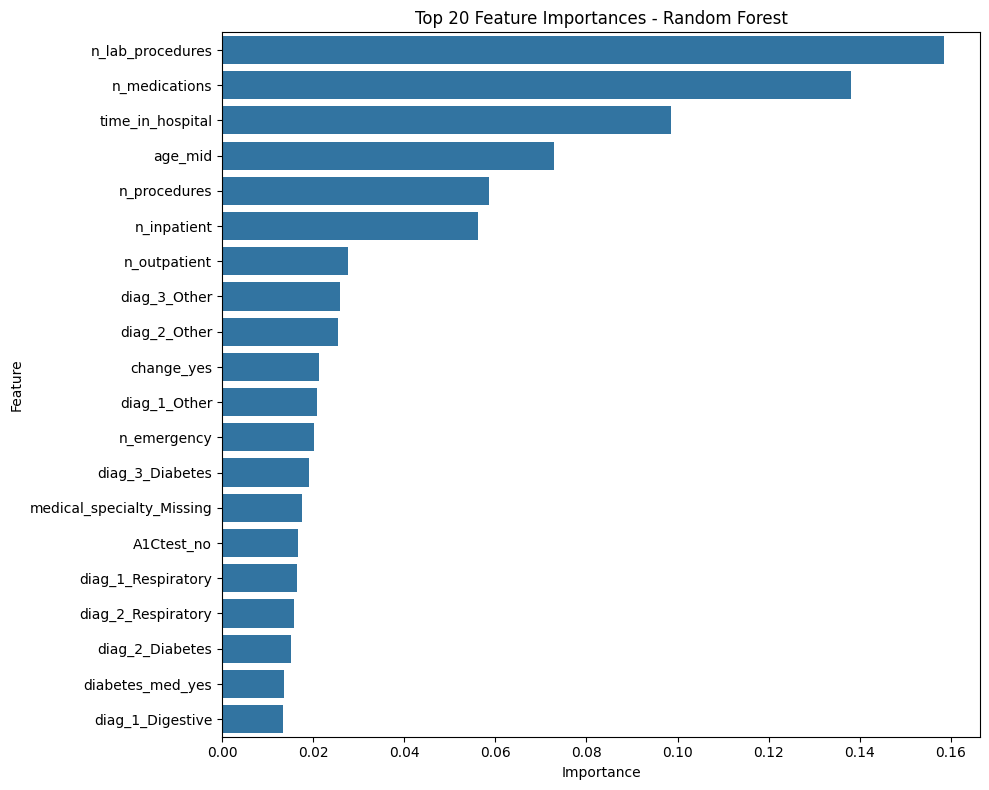

In [24]:
# Feature importance - top 20 only
importances = model_rf.feature_importances_
feat_names = X.columns

feat_df = pd.DataFrame({
    'Feature': feat_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)  # top 20 features

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Top 20 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()


In [26]:
# --- Top 5 Risk Factors for Readmission ---
top5_features = feat_df.head(5)
print("Top 5 Risk Factors for Hospital Readmission (by Random Forest Importance):")
for i, row in top5_features.iterrows():
    print(f"{i+1}. {row['Feature']} (Importance: {row['Importance']:.4f})")


Top 5 Risk Factors for Hospital Readmission (by Random Forest Importance):
2. n_lab_procedures (Importance: 0.1585)
4. n_medications (Importance: 0.1381)
1. time_in_hospital (Importance: 0.0985)
8. age_mid (Importance: 0.0728)
3. n_procedures (Importance: 0.0586)


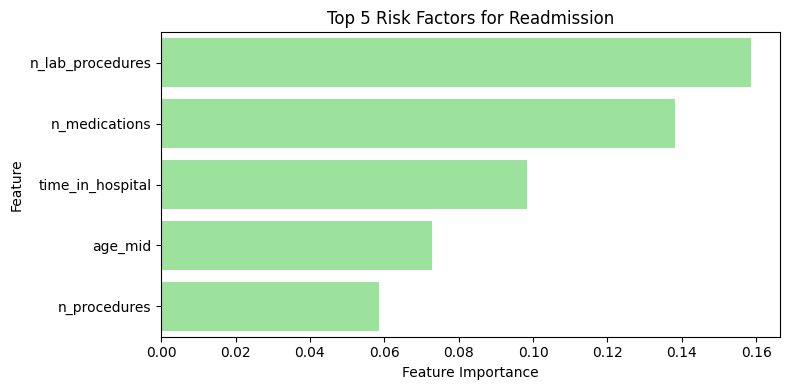

In [32]:
plt.figure(figsize=(8,4))
sns.barplot(x='Importance', y='Feature', data=top5_features, color='lightgreen')
plt.title("Top 5 Risk Factors for Readmission")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

